# NLP Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk

In [ ]:
#Building a Spam-detection Filter

In [3]:
#nltk comes with certain datasets that are important for the package to perform
#keep entering l in the textbox until you reach at the end of the page and then enter d for download and then finally the package that you want to enter
#q to quit the shell
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        C:\Users\pragy\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [4]:
#we will use sms data from UCI Machine Learning repository for building a spam detection filter

In [5]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [6]:
print(len(messages))

5574


In [8]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [9]:
#collection of texts is called corpus
#now we number the first 10 messages

In [10]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [11]:
#This is a tsv file tab separated file

In [12]:
import pandas as pd

In [13]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [14]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory Data Analysis

In [15]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
#Observe that the number of unique messages are less than the number of total messages
#this could be because of some common text messages such as yes or no or I'll call you later

In [17]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [18]:
#most popular ham message is Sorry, I'll call later

In [19]:
#Major part of the NLP project is feature engineering and it is a very large part of spam detection in general

In [20]:
#Now we make a new column that describes how long the text messages are

In [21]:
messages['length'] = messages['message'].apply(len)

In [22]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
#lets visualize the length of the text message

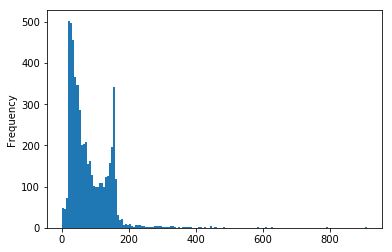

In [26]:
messages['length'].plot.hist(bins=150)

In [27]:
#the above histogram shows a bimodal behavior that is that it has two peaks or max points
#the message length goes uptil around 1000

In [29]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [30]:
#Find the message with length where length is 910 through pandas masking

In [34]:
messages[messages['length'] == 910]['message'].iloc[0] #iloc[0] prints out the entire string

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [35]:
#Important to explore outliers
#It is also important to see later if the length of the message is important to determine whether a message is spam or a ham

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017D4DAE90B8>,
      dtype=object)

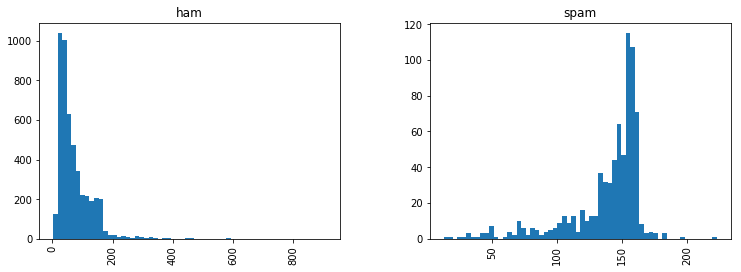

In [36]:
#Making subplots using pandas data visualization feature or Pandas own version of FacetGrid
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

In [38]:
#max number of ham messages are shorter than length as compared to spam messages as most of the spam messages tend to be long; also explained by the left skewed distribution
#Therefore, length is a good feature to distinguish spam messages from ham; that's why we have a bimodal behavior of the distribution

# NLP Part 2 - Text Pre-Processing

In [39]:
#Step 1 - Remove Punctuations
import string

In [40]:
mess = 'Sample message! Notice: It has punctuation.'

In [42]:
string.punctuation #returns a list of punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [62]:
#Example
nopunc = [c for c in mess if c not in string.punctuation]

In [63]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'I',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [46]:
#all punctuations have been removed

In [47]:
#Step 2 - Remove Stop words such as 'if', 'and', etc

In [48]:
from nltk.corpus import stopwords

In [50]:
stopwords.words('english') #this returns a list of english stopwords that donot produce any distinguishing feature as they are quite common

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [64]:
nopunc = ''.join(nonpunc)

In [65]:
nopunc

'Sample message Notice It has punctuation'

In [54]:
x = ['a','b','c','d']

In [58]:
x = ''.join(x) #the object within single quotes acts as a concatenation device

In [57]:
x

'abcd'

In [66]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [61]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [68]:
#create a text processing function
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [71]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Tokenization

In [70]:
#apply the text processing function to messages data
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [72]:
#stemming is another method of continuining text pre-processing as it removes the stem words or the root words that keep repeating

In [73]:
#we are skipping stemming here as the text data contains a lot of short forms

In [74]:
#now after tokenization, we need to convert the list of tokens to vectors

# Vectorization

In [75]:
#converting to vector or bag of words so that a machine learning model can understand

In [76]:
#Bag of Words

There are 3 steps to create a Bag of Words:
1. Count how many times does a word occur in each message (Known as term frequency)
2. Weight the counts such that frequent tokens get lower weight (inverse document frequency)
3. Normalize the vector to unit length, to abstract the vector from original text length (L2 norm)

We use Scikit Learn's CountVectorizer which is a 2-dimensional matrix that consists of the messages on one axis and the unique word counts in each message on the other axis.

As there are going to be a lot of messages, there are also going to be a number of 0 word counts so scikit converts them into a sparse matrix. A sparse matrix is one in which there are a lot of zero values. Instead of just making each number an element,we can fit these numbers among a matrix of zeroes i.e. a sparse matrix.

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [79]:
#count the vocabulary
print(len(bow_transformer.vocabulary_))

11425


In [80]:
#we can check the bag of words for a sample text message
mess4 = messages['message'][3]

In [82]:
print(mess4)

U dun say so early hor... U c already then say...


In [83]:
bow4 = bow_transformer.transform([mess4])

In [85]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [86]:
#creating bag of words for mess4
print(bow4.shape)

(1, 11425)


In [87]:
#1 by the entire 11425
#It means that there are 7 unique words in message 4 and that is after removing the common stop words
#as we can see that 2 appears twice so we can find out where do the 2 words occur

In [91]:
bow_transformer.get_feature_names()[4068]

'U'

In [92]:
#it means that 'U' shows twice and we can already see that in the above message
#we can also see where do the 2 Us occur at index 9554

In [93]:
bow_transformer.get_feature_names()[9554]

'say'

In [94]:
#say also shows up twice so we count the repeated words as 1 and therefore, there are 7 unique words in the text message

# NLP with Python Part 3

In [95]:
message_bow = bow_transformer.transform(messages['message'])

In [96]:
print('Shape of Sparse matrix:', message_bow.shape)

Shape of Sparse matrix: (5572, 11425)


In [97]:
#get the number of non zero occurences
message_bow.nnz

50548

In [98]:
#check the sparsity
sparsity = (100.0*message_bow.nnz / (message_bow.shape[0]*message_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [99]:
#0 because we have used a round function

In [100]:
#check the sparsity or compare the number of non zeroes with respect to the entire matrix
sparsity = (100.0*message_bow.nnz / (message_bow.shape[0]*message_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [101]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

In [102]:
tfidf_transformer = TfidfTransformer().fit(message_bow)

In [104]:
tfidf4 = tfidf_transformer.transform(bow4)

In [105]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [106]:
#these numbers can be interpreted as weight values for each of the words versus the actual document

In [107]:
#we can also check the inverse document frequency of any word like 'University'
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [108]:
messages_tfidf = tfidf_transformer.transform(message_bow)

In [109]:
#we will use the Naive Bayes Classifier for classifying our dataset
from sklearn.naive_bayes import MultinomialNB

In [110]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [111]:
spam_detect_model.predict(tfidf)[0]

'ham'

In [115]:
#we can check our original data that our model has correctly predicted the 4th message as ham
messages['label'][3]

'ham'

In [116]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [117]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [118]:
#Train test split
from sklearn.model_selection import train_test_split

In [119]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.30)

In [122]:
#we can use scikit learn's pipeline capabilities to store an entire pipeline of our workflow that will save us so many lines of code done above
#we don't have to repeat the above code for different sets of data everytime so the pipeline feature of sklearn stores the above data

In [121]:
from sklearn.pipeline import Pipeline

In [125]:
#this pipeline will do al the required text pre-processing steps
#Treat this pipeline as a normal estimator
pipeline = Pipeline([
         ('bow', CountVectorizer(analyzer=text_process)), 
         ('tfidf',TfidfTransformer()),
         ('classifier', MultinomialNB())
    ])

In [128]:
#now we can simply put the train and test data in the pipeline and all the steps would be performed with it
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000017D4D527AE8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [131]:
predictions = pipeline.predict(msg_test)

In [132]:
from sklearn.metrics import classification_report,confusion_matrix

In [134]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1456
        spam       1.00      0.73      0.84       216

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.97      0.96      1672



In [135]:
#97% accuracy

In [ ]:
#we can also use a random forest classifier and compare the prediction accuracy with a NB classifier